# Functions used in Syllabus

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course

## Learning goals:

* Show how the figures in the syllabus are made
* Get familiar with Jupyter and Python 

## Introduction

This Notebook is not part of the assignments, but just shows how some of the custrom figures used in the course syllabus are produced. It also serves as a repository for reproducing these figures for future versions of the syllabus.

In [2]:
# Import required packages

# Basic packages
import pandas as pd # The 'pandas' package helps us to import and manage data
import random as random # To randomly sample data
import numpy as np # To modify and work with datasets
import scipy.stats as stats # The 'scipy' package contains statistical formulas we will need

# Correlation and regression
import statsmodels.formula.api as smf # The 'statsmodels' package contains the functions needed to do regressions
import statsmodels.api as sm # The 'statsmodels' package contains the functions we need to run regression models
from scipy.stats import pearsonr # For calculating the Pearson's r

# Plotting
import matplotlib.pyplot as plt # For plotting
import matplotlib.patches as patches # To add shapes to plots

# Multivariate analysis
from scipy.stats import multivariate_normal # To generate multivariate normal distributions
from mpl_toolkits.mplot3d import Axes3D # To plot 3D graphs

# Clustering and classification
from scipy.cluster.hierarchy import dendrogram, linkage # to plot dendrograms
from scipy.spatial.distance import pdist, squareform # to perform hierarchical classification and data preparation

# Factor Analysis
from sklearn.decomposition import PCA # Needed for PCA and principle axis analysis

# Time Series Analysis
from scipy.io import loadmat

# The line below allows us to visualize plots we make directly in the notebook
%matplotlib inline

## Figure 3: covariance and correlation examples
The code below creates variables `x` and `y` and colors datapoints based on how they contribute to the covariance between the variables.

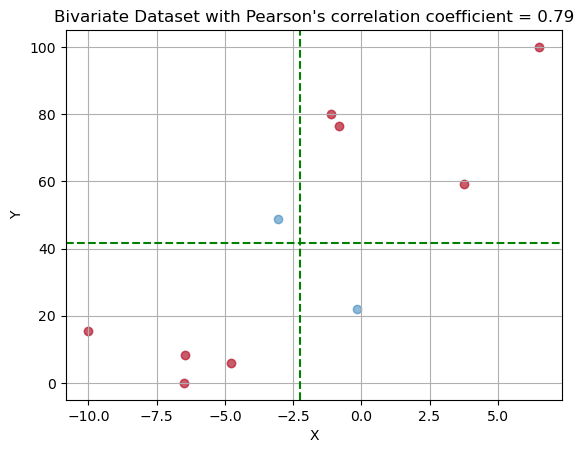

In [2]:
# Figure 3

# Define parameters
num_samples = 10
mean = [0, 0]
covariance_matrix = [[1, 0.6], [0.6, 1]]

# Generate bivariate dataset with Pearson's r correlation of 0.6
random.seed(0) # Set seed for reproducibility
x, y = np.random.multivariate_normal(mean, covariance_matrix, num_samples).T # create x and y variables from a normal distribution

# Scale x values to range between -10 and 10
x = x * 10 / max(abs(x))

# Scale y values to range between 0 and 100
y = (y - min(y)) * 100 / (max(y) - min(y))

# Check the actual correlation coefficient
correlation_coefficient, p_value = pearsonr(x, y)

# Calculate mean values of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a mask for points above and below mean values
mask_above = (x >= mean_x) & (y >= mean_y)
mask_below = (x <= mean_x) & (y <= mean_y)

# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha = 0.5, label = 'negative covariance contribution') # Plot points
plt.scatter(x[mask_above], y[mask_above], color = 'red', alpha = 0.5, label = 'positive covariance contribution') # color points with values for both x and y above the means red (positive contribution to covariance)
plt.scatter(x[mask_below], y[mask_below], color = 'red', alpha = 0.5, label = 'positive covariance contribution') # color points with values for both x and y below the means red (positive contribution to covariance)
plt.axhline(mean_y, color = 'green', linestyle = '--', label = 'Mean Y')
plt.axvline(mean_x, color = 'green', linestyle = '--', label = 'Mean X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Dataset with Pearson\'s correlation coefficient = ' + str(round(correlation_coefficient, 2)))
plt.grid(True)
plt.show()

The code below does the same, but with y being related to x by a second order polinomial (quadratic function). The linear correlation is very small (-0.03)

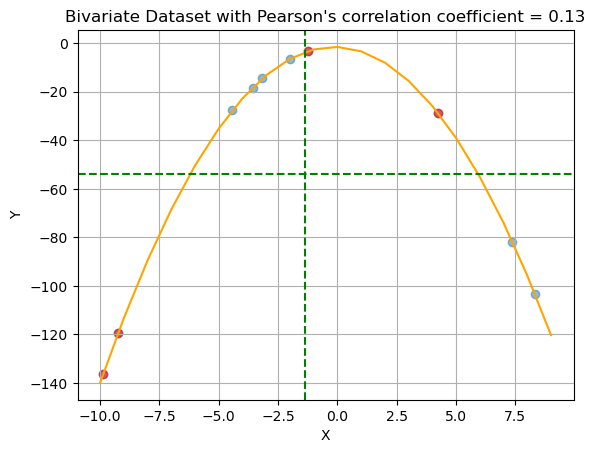

In [3]:
# Define parameters
num_samples = 10
x_range = (-10, 10)

# Generate x values
random.seed(5)
x = np.random.uniform(x_range[0], x_range[1], num_samples)

# Compute y values based on a quadratic function of x plus
a, b, c = np.random.uniform(-2, 2, 3) # coefficients for the quadratic function
y = a * x**2 + b * x + c

# Check the actual correlation coefficient
correlation_coefficient2, p_value2 = pearsonr(x, y)

# Fit a second-order polynomial curve to the data
smoothed_y = np.polyval((a, b, c), range(-10, 10))

# Calculate mean values of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a mask for points above and below mean values
mask_above = (x > mean_x) & (y > mean_y)
mask_below = (x < mean_x) & (y < mean_y)

# Plot the data with different colors
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.5, label = 'negative covariance contribution') # Plot points
plt.scatter(x[mask_above], y[mask_above], color='red', alpha=0.5, label = 'positive covariance contribution') # color points with values for both x and y above the means red (positive contribution to covariance)
plt.scatter(x[mask_below], y[mask_below], color='red', alpha=0.5, label = 'positive covariance contribution') # color points with values for both x and y below the means red (positive contribution to covariance)
plt.plot(range(-10, 10), smoothed_y, color='orange', label='Smoothed Curve') # Plot polynomial function through points
plt.axhline(mean_y, color='green', linestyle='--', label='Mean Y')
plt.axvline(mean_x, color='green', linestyle='--', label='Mean X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Dataset with Pearson\'s correlation coefficient = ' + str(round(correlation_coefficient2, 2)))
plt.grid(True)
plt.show()

## Figure 5: Scatterplot of the elevation and soil organic matter weight % variables

(5.0, 40.0)

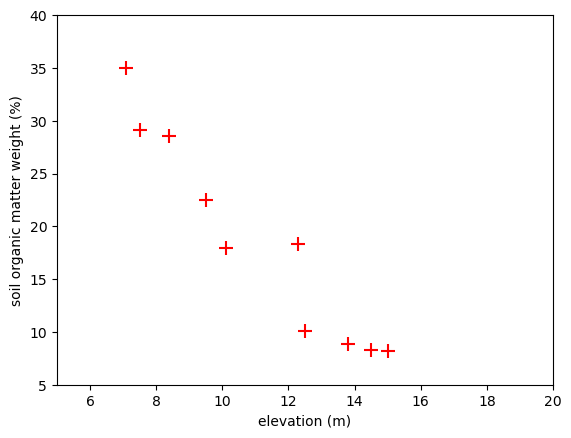

In [4]:
# Define variables
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])

# Create scatterplot
plt.scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
plt.xlabel('elevation (m)')
plt.ylabel('soil organic matter weight (%)')
plt.xlim(5, 20)
plt.ylim(5, 40)

## Figure 6: A regression for describing the relation between soil organic matter and elevation

-3.235047436610967
54.501975123283394


Text(12.5, 10.1, '')

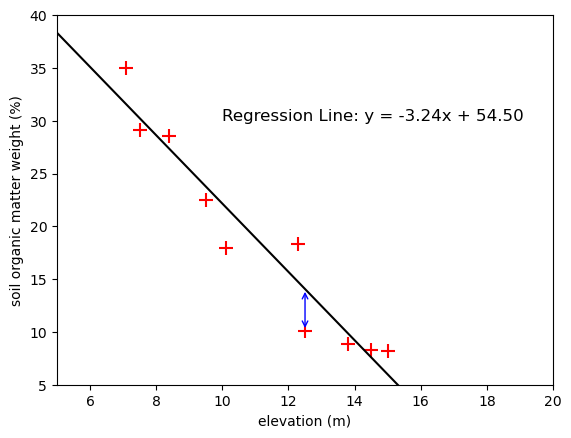

In [5]:
# Define variables
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])

# Perform linear regression
slope, intercept = np.polyfit(elev, OMsoil, 1)

print(slope)
print(intercept)

# Create scatterplot
plt.scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope * np.array([5, 20]) + intercept, color='black', label='Linear Regression')
plt.xlabel('elevation (m)')
plt.ylabel('soil organic matter weight (%)')
plt.xlim(5, 20)
plt.ylim(5, 40)

# Print the formula for the regression line
plt.text(10, 30, f'Regression Line: y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='black')

# Add annotation with arrow
x_value = 12.5
y_value = slope * x_value + intercept
plt.annotate('', xy=(x_value, y_value), xytext=(x_value, 10.1), arrowprops=dict(arrowstyle='<->', color='blue'))

## Figure 7: A near-horizontal regression line with large deviations may indicate that a relationship between the dependent and independent variable is absent.

0.06701958297200489
10.418093216499908


(0.0, 25.0)

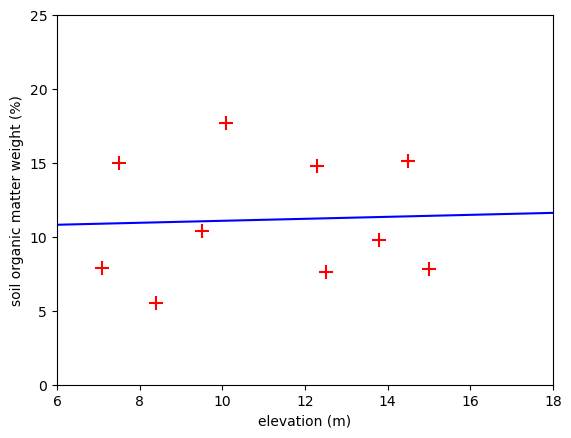

In [5]:
# Define variables
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([7.8, 15.1, 9.8, 7.6, 14.8, 17.7, 10.4, 5.5, 15, 7.9])

# Perform linear regression
slope, intercept = np.polyfit(elev, OMsoil, 1)

print(slope)
print(intercept)

# Create scatterplot
plt.scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope * np.array([5, 20]) + intercept, color='blue', label='Linear Regression')
plt.xlabel('elevation (m)')
plt.ylabel('soil organic matter weight (%)')
plt.xlim(6, 18)
plt.ylim(0, 25)


## Figure 8: Plots of a the total variance, estimated variance and residual variance for a regression.

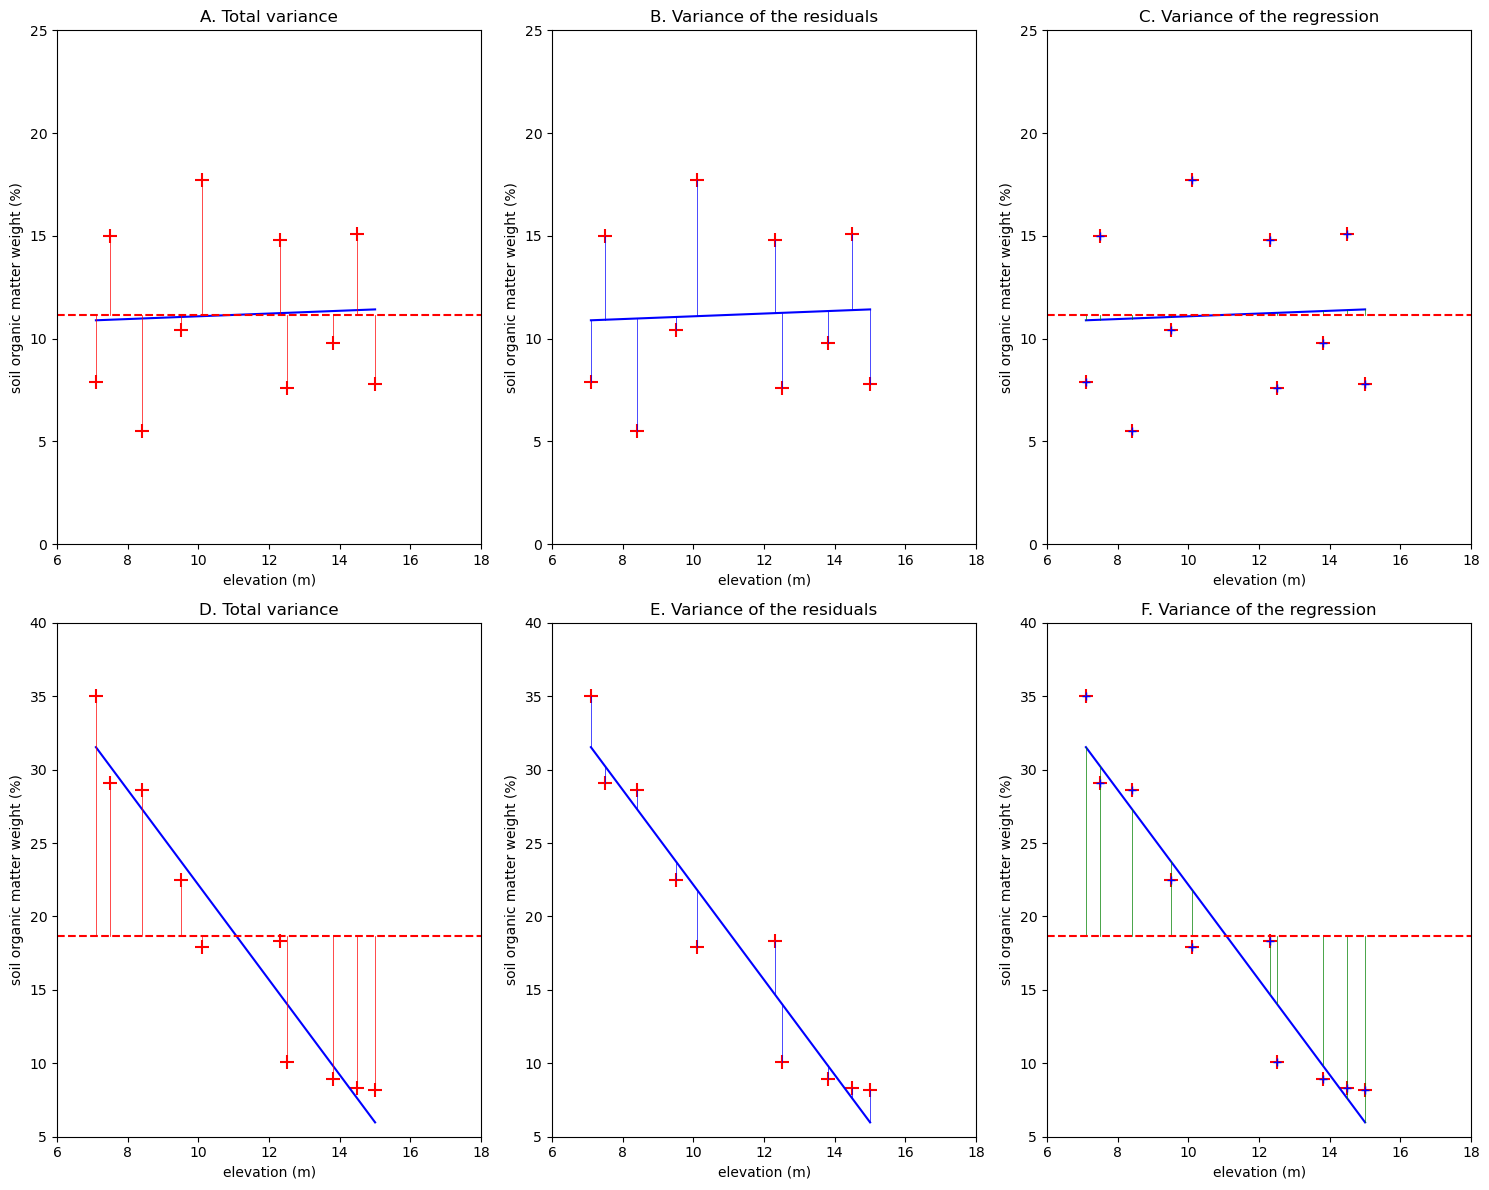

In [6]:
# Variables and regression
# Dataset 1
elev = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil = np.array([7.8, 15.1, 9.8, 7.6, 14.8, 17.7, 10.4, 5.5, 15, 7.9])
slope, intercept = np.polyfit(elev, OMsoil, 1)
mean_omsoil = np.mean(OMsoil)

# Dataset 2
elev_2 = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil_2 = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])
slope_2, intercept_2 = np.polyfit(elev_2, OMsoil_2, 1)
mean_omsoil_2 = np.mean(OMsoil_2)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 12))

# Plot A
axs[0, 0].scatter(elev, OMsoil, marker = '+', s = 100, color = "red")
axs[0, 0].plot(elev, slope * elev + intercept, color='blue', label='Linear Regression')
axs[0, 0].axhline(y=mean_omsoil, color='red', linestyle='--', label='Mean OM Soil')
for i in range(len(elev)):
    axs[0, 0].plot([elev[i], elev[i]], [OMsoil[i], mean_omsoil], color='red', linestyle='-', linewidth=0.5)
axs[0, 0].set_title('A. Total variance')
axs[0, 0].set_xlabel('elevation (m)')
axs[0, 0].set_ylabel('soil organic matter weight (%)')
axs[0, 0].set_xlim(6, 18)
axs[0, 0].set_ylim(0, 25)

# Plot B
axs[0, 1].scatter(elev, OMsoil, marker = '+', s = 100, color = "red")
axs[0, 1].plot(elev, slope * elev + intercept, color='blue', label='Linear Regression')
for i in range(len(elev)):
    axs[0, 1].plot([elev[i], elev[i]], [OMsoil[i], slope * elev[i] + intercept], color='blue', linestyle='-', linewidth=0.5)
axs[0, 1].set_title('B. Variance of the residuals')
axs[0, 1].set_xlabel('elevation (m)')
axs[0, 1].set_ylabel('soil organic matter weight (%)')
axs[0, 1].set_xlim(6, 18)
axs[0, 1].set_ylim(0, 25)

# Plot C
axs[0, 2].scatter(elev, OMsoil, marker = '+', s = 100, color = "red")
axs[0, 2].plot(elev, slope * elev + intercept, color='blue', label='Linear Regression')
for i in range(len(elev)):
    axs[0, 2].plot([elev[i], elev[i]], [mean_omsoil, slope * elev[i] + intercept], color='green', linestyle='-', linewidth=0.5)
axs[0, 2].plot(elev, OMsoil, '+', color='blue')
axs[0, 2].axhline(y=mean_omsoil, color='red', linestyle='--', label='Mean OM Soil')
axs[0, 2].set_title('C. Variance of the regression')
axs[0, 2].set_xlabel('elevation (m)')
axs[0, 2].set_ylabel('soil organic matter weight (%)')
axs[0, 2].set_xlim(6, 18)
axs[0, 2].set_ylim(0, 25)

# Plot D
axs[1, 0].scatter(elev_2, OMsoil_2, marker = '+', s = 100, color = "red")
axs[1, 0].plot(elev_2, slope_2 * elev_2 + intercept_2, color='blue', label='Linear Regression')
axs[1, 0].axhline(y=mean_omsoil_2, color='red', linestyle='--', label='Mean OM Soil')
for i in range(len(elev_2)):
    axs[1, 0].plot([elev_2[i], elev_2[i]], [OMsoil_2[i], mean_omsoil_2], color='red', linestyle='-', linewidth=0.5)
axs[1, 0].set_title('D. Total variance')
axs[1, 0].set_xlabel('elevation (m)')
axs[1, 0].set_ylabel('soil organic matter weight (%)')
axs[1, 0].set_xlim(6, 18)
axs[1, 0].set_ylim(5, 40)

# Plot E
axs[1, 1].scatter(elev_2, OMsoil_2, marker = '+', s = 100, color = "red")
axs[1, 1].plot(elev_2, slope_2 * elev_2 + intercept_2, color='blue', label='Linear Regression')
for i in range(len(elev_2)):
    axs[1, 1].plot([elev_2[i], elev_2[i]], [OMsoil_2[i], slope_2 * elev_2[i] + intercept_2], color='blue', linestyle='-', linewidth=0.5)
axs[1, 1].set_title('E. Variance of the residuals')
axs[1, 1].set_xlabel('elevation (m)')
axs[1, 1].set_ylabel('soil organic matter weight (%)')
axs[1, 1].set_xlim(6, 18)
axs[1, 1].set_ylim(5, 40)

# Plot F
axs[1, 2].scatter(elev_2, OMsoil_2, marker = '+', s = 100, color = "red")
axs[1, 2].plot(elev_2, slope_2 * elev_2 + intercept_2, color='blue', label='Linear Regression')
for i in range(len(elev_2)):
    axs[1, 2].plot([elev_2[i], elev_2[i]], [mean_omsoil_2, slope_2 * elev_2[i] + intercept_2], color='green', linestyle='-', linewidth=0.5)
axs[1, 2].plot(elev_2, OMsoil_2, '+', color='blue')
axs[1, 2].axhline(y=mean_omsoil_2, color='red', linestyle='--', label='Mean OM Soil')
axs[1, 2].set_title('F. Variance of the regression')
axs[1, 2].set_xlabel('elevation (m)')
axs[1, 2].set_ylabel('soil organic matter weight (%)')
axs[1, 2].set_xlim(6, 18)
axs[1, 2].set_ylim(5, 40)

# Adjust layout
plt.tight_layout()

## Figure 9: Covariance and correlation example with polynomial curve

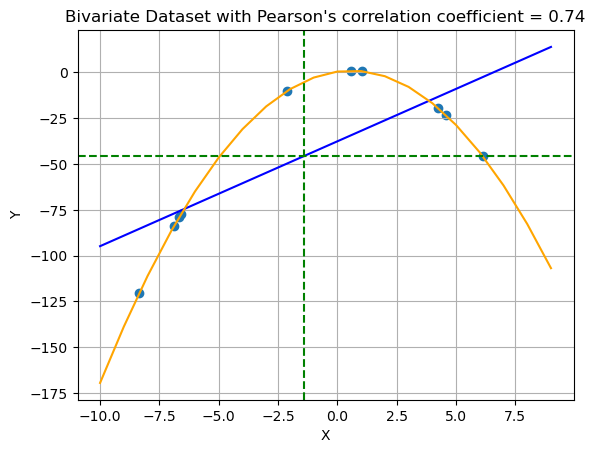

In [7]:
# Define parameters
num_samples = 10
x_range = (-10, 10)

# Generate x values
random.seed(5)
x = np.random.uniform(x_range[0], x_range[1], num_samples)

# Compute y values based on a quadratic function of x plus
a, b, c = np.random.uniform(-2, 2, 3) # coefficients for the quadratic function
y = a * x**2 + b * x + c

# Check the actual correlation coefficient
correlation_coefficient2, p_value2 = pearsonr(x, y)

# Fit a linear regression to the data
slope, intercept = np.polyfit(x, y, 1)

# Fit a second-order polynomial curve to the data
smoothed_y = np.polyval((a, b, c), range(-10, 10))

# Calculate mean values of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create a mask for points above and below mean values
mask_above = (x > mean_x) & (y > mean_y)
mask_below = (x < mean_x) & (y < mean_y)

# Plot the data with different colors
import matplotlib.pyplot as plt

plt.scatter(x, y, label = 'negative covariance contribution') # Plot points
plt.plot(range(-10, 10), slope * range(-10, 10) + intercept, color='blue', label='Linear Regression') # Plot the linear regression line
plt.plot(range(-10, 10), smoothed_y, color='orange', label='Smoothed Curve') # Plot polynomial function through points
plt.axhline(mean_y, color='green', linestyle='--', label='Mean Y')
plt.axvline(mean_x, color='green', linestyle='--', label='Mean X')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bivariate Dataset with Pearson\'s correlation coefficient = ' + str(round(correlation_coefficient2, 2)))
plt.grid(True)
plt.show()

## Figure 10: Linear regression through a dataset before and after outlier detection

Text(10, 30, 'Regression Line with outliers:\ny = -3.24x + 54.50\nPearsons r = -0.96')

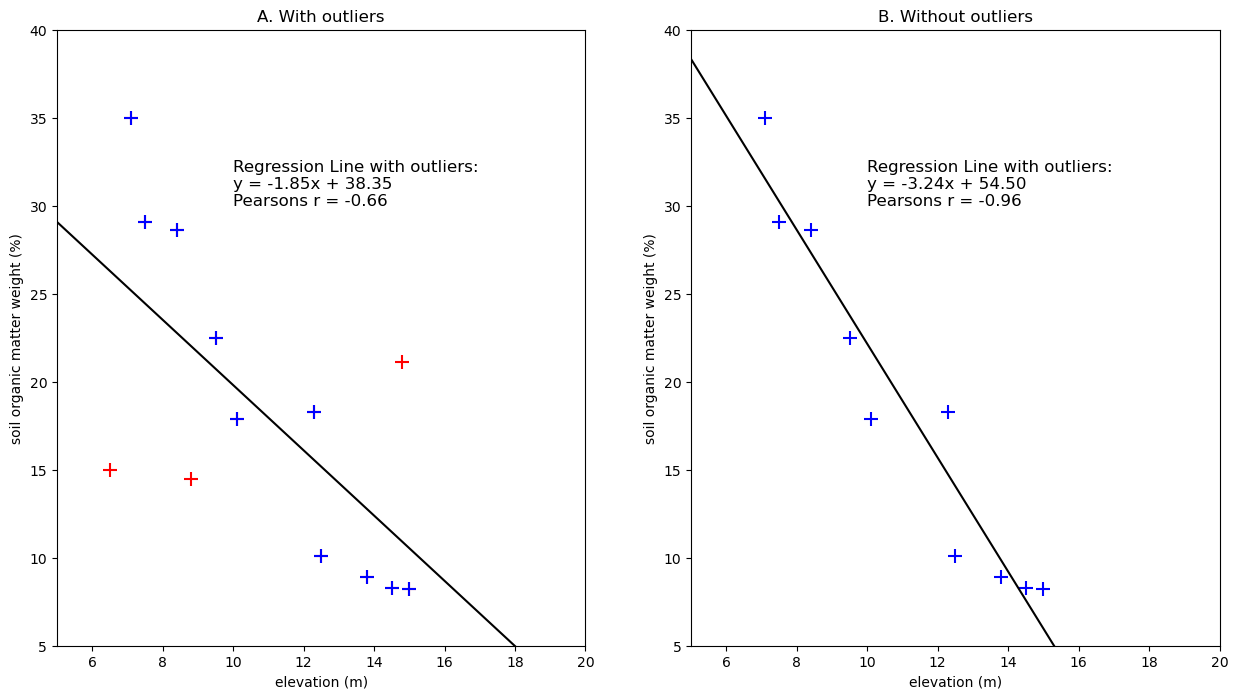

In [8]:
# Define variables
elev = np.array([15, 14.8, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.8, 8.4, 7.5, 7.1, 6.5])
OMsoil = np.array([8.2, 21.1, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 14.5, 28.6, 29.1, 35, 15])

# Perform linear regression
slope, intercept = np.polyfit(elev, OMsoil, 1)

# Check the correlation coefficient with outliers
correlation_coefficient, p_value = pearsonr(elev, OMsoil)

# Remove outliers
elev_clean = np.array([15, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.4, 7.5, 7.1])
OMsoil_clean = np.array([8.2, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 28.6, 29.1, 35])

# Perform linear regression
slope_clean, intercept_clean = np.polyfit(elev_clean, OMsoil_clean, 1)

# Check the correlation coefficient with outliers
correlation_coefficient_clean, p_value_clean = pearsonr(elev_clean, OMsoil_clean)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot A
axs[0].scatter(elev, OMsoil, marker = '+', s = 100, color = "red") # Plot points
axs[0].scatter(elev_clean, OMsoil_clean, marker = '+', s = 100, color = "blue") # Plot non-outliers
axs[0].plot(np.array([5, 20]), slope * np.array([5, 20]) + intercept, color='black', label='Linear Regression')
axs[0].set_title('A. With outliers')
axs[0].set_xlabel('elevation (m)')
axs[0].set_ylabel('soil organic matter weight (%)')
axs[0].set_xlim(5, 20)
axs[0].set_ylim(5, 40)

# Print the formula for the regression line
axs[0].text(10, 30, f'Regression Line with outliers:\ny = {slope:.2f}x + {intercept:.2f}\nPearsons r = {correlation_coefficient:.2f}', fontsize=12, color='black')

# # Plot B
axs[1].scatter(elev_clean, OMsoil_clean, marker = '+', s = 100, color = "blue") # Plot non-outliers
axs[1].plot(np.array([5, 20]), slope_clean * np.array([5, 20]) + intercept_clean, color='black', label='Linear Regression')
axs[1].set_title('B. Without outliers')
axs[1].set_xlabel('elevation (m)')
axs[1].set_ylabel('soil organic matter weight (%)')
axs[1].set_xlim(5, 20)
axs[1].set_ylim(5, 40)

# Print the formula for the regression line
axs[1].text(10, 30, f'Regression Line with outliers:\ny = {slope_clean:.2f}x + {intercept_clean:.2f}\nPearsons r = {correlation_coefficient_clean:.2f}', fontsize=12, color='black')

## Figure 12: Transformed exponential relationship example A

The regression coefficients are:
 Intercept   -1008.320818
df.Year         0.685790
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                df.pCO2   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     613.5
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.87e-51
Time:                        08:19:57   Log-Likelihood:                -551.53
No. Observations:                 133   AIC:                             1107.
Df Residuals:                     131   BIC:                             1113.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\nwi213\AppData\Local\Temp\ipykernel_18396\612494119.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.Year, linregression.params[0] + linregression.params[1] * df.Year, color = 'blue')


Text(0.5, 1.0, 'Atmospheric CO2 concentration over time')

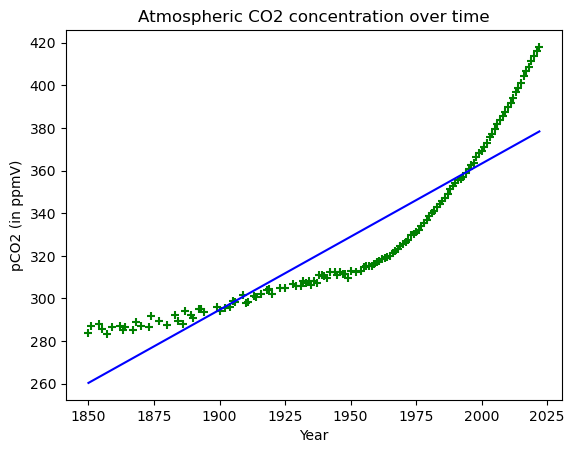

In [9]:
# load CO2 vs temperature data
df = pd.read_csv('CO2_temperature.csv') # Load the second dataset for this assignment in the Jupyter environment.

# Create linear regression between pCO2 and Year in dataset df
linregression = smf.ols(formula = "df.pCO2 ~ df.Year", data = df).fit()

# Print the regression coefficients of the new linear regression
print('The regression coefficients are:\n', linregression.params)

# Print the regression summary to check the strength and the significance of the linear model
print(linregression.summary())

# Plot pCO2 vs time (Plot A)
plt.scatter(df.Year, df.pCO2, color = 'green', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (in ppmV)')
plt.plot(df.Year, linregression.params[0] + linregression.params[1] * df.Year, color = 'blue')
plt.title('Atmospheric CO2 concentration over time')

## Figure 13: Transformed exponential relationship example B

                            OLS Regression Results                            
Dep. Variable:             logCO2_rel   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     5689.
Date:                Thu, 01 Aug 2024   Prob (F-statistic):          8.41e-110
Time:                        08:20:00   Log-Likelihood:                 77.814
No. Observations:                 133   AIC:                            -151.6
Df Residuals:                     131   BIC:                            -145.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7155      0.027     64.059      0.0

C:\Users\nwi213\AppData\Local\Temp\ipykernel_18396\4126999029.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c2 = np.exp(expreg.params[0]) # Calculate the parameter c by taking the natural exponent
C:\Users\nwi213\AppData\Local\Temp\ipykernel_18396\4126999029.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.Yearrel, expreg.params[0] + expreg.params[1] * df.Yearrel, color = 'purple')


Text(0.5, 1.0, 'Natural logarithm of atmospheric CO2 concentration over time')

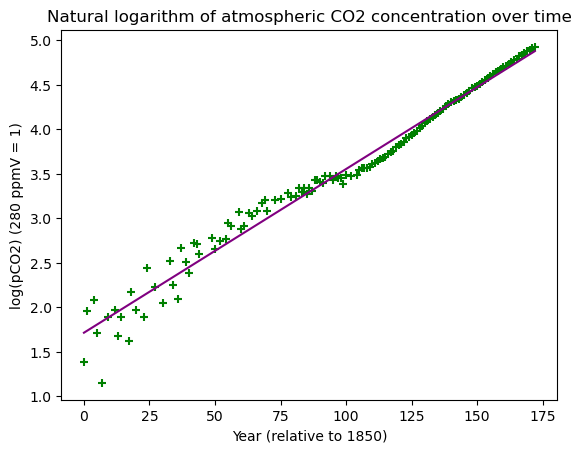

In [10]:
# load CO2 vs temperature data
df = pd.read_csv('CO2_temperature.csv') # Load the second dataset for this assignment in the Jupyter environment.

# Create relative pCO2 and Year variables
df['pCO2rel'] = df.pCO2 - 280
df['Yearrel'] = df.Year - 1850

df['logCO2_rel'] = np.log(df.pCO2rel) # Create a new variable that is the natural logarithm of the modified pCO2 variable

expreg = smf.ols(formula = "logCO2_rel ~ Yearrel", data = df).fit() # Perform the 'exponential' regression in its linearized form

print(expreg.summary()) # Print the regression summary

c2 = np.exp(expreg.params[0]) # Calculate the parameter c by taking the natural exponent

# Plot log(pCO2) vs time (Plot B)
plt.scatter(df.Yearrel, df.logCO2_rel, color = 'green', marker = '+')
plt.xlabel('Year (relative to 1850)')
plt.ylabel('log(pCO2) (280 ppmV = 1)')
plt.plot(df.Yearrel, expreg.params[0] + expreg.params[1] * df.Yearrel, color = 'purple')
plt.title('Natural logarithm of atmospheric CO2 concentration over time')

## Figure 14: Transformed exponential relationship example C

C:\Users\nwi213\AppData\Local\Temp\ipykernel_18396\1816463497.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df.Year, np.exp(expreg.params[0]) * np.exp(expreg.params[1] * (df.Yearrel)) + 280, color = 'purple')


Text(0.5, 1.0, 'Atmospheric CO2 concentration over time')

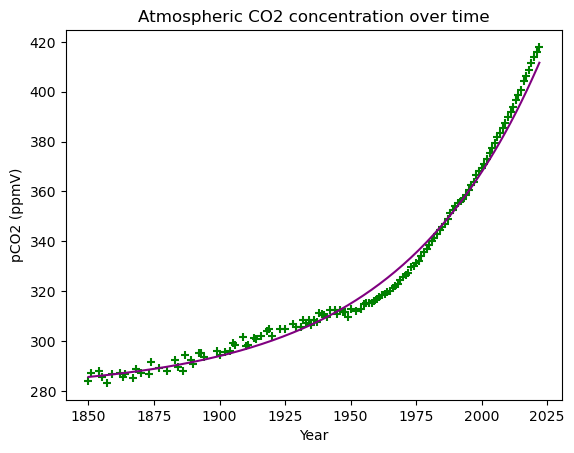

In [11]:
# Plot the exponential model on top of the pCO2 data (Plot C)
plt.scatter(df.Year, df.pCO2, color = 'green', marker = '+')
plt.xlabel('Year')
plt.ylabel('pCO2 (ppmV)')
plt.plot(df.Year, np.exp(expreg.params[0]) * np.exp(expreg.params[1] * (df.Yearrel)) + 280, color = 'purple')
plt.title('Atmospheric CO2 concentration over time')

## Figure 17: Simple linear regression result depends on which of the variables is considered the independent variable.

Text(10, 25, 'Regression 2: GS = -0.24 * SR + 15.16')

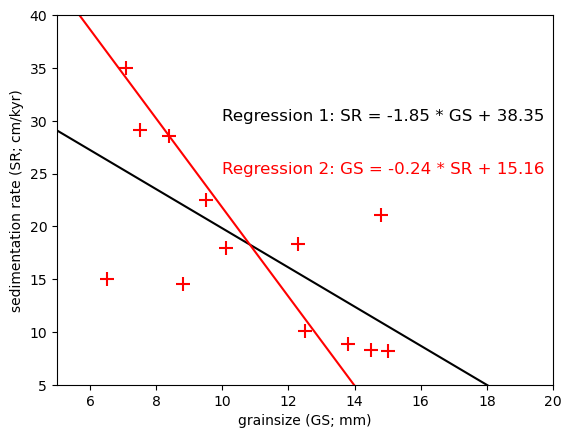

In [12]:
# Define variables (same as Figure 5)
grainsize = np.array([15, 14.8, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.8, 8.4, 7.5, 7.1, 6.5])
sedrate = np.array([8.2, 21.1, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 14.5, 28.6, 29.1, 35, 15])

# Perform linear regression in two directions
slope1, intercept1 = np.polyfit(grainsize, sedrate, 1)
slope2, intercept2 = np.polyfit(sedrate, grainsize, 1)

# Create scatterplot
plt.scatter(grainsize, sedrate, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope1 * np.array([5, 20]) + intercept1, color='black', label='Linear Regression 1: sedimentation rate ~ grain size')
plt.plot(np.array([5, 20]), (np.array([5, 20]) - intercept2) / slope2, color='red', label='Linear Regression 2: grain size ~ Sedimentation rate')
plt.xlabel('grainsize (GS; mm)')
plt.ylabel('sedimentation rate (SR; cm/kyr)')
plt.xlim(5, 20)
plt.ylim(5, 40)

# Print the formula for the regression line
plt.text(10, 30, f'Regression 1: SR = {slope1:.2f} * GS + {intercept1:.2f}', fontsize=12, color='black')
plt.text(10, 25, f'Regression 2: GS = {slope2:.2f} * SR + {intercept2:.2f}', fontsize=12, color='red')

## Figure 19: Simple linear regression result with two different choices of independent variables and the major axis.

Text(10, 22.5, 'Regression 2: GS = -0.24 * SR + 15.16')

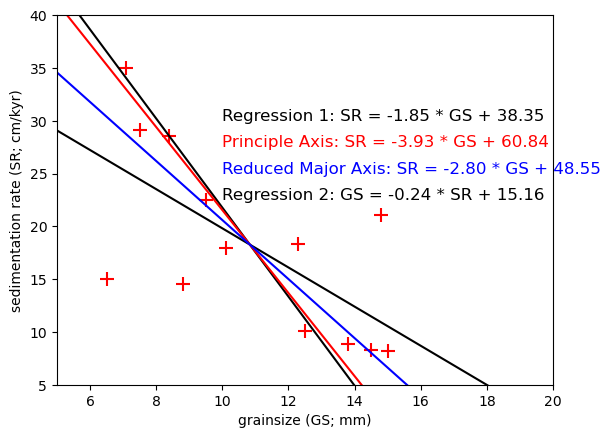

In [13]:
# Define variables (same as Figure 5)
grainsize = np.array([15, 14.8, 14.5, 13.8, 12.5, 12.3, 10.1, 9.5, 8.8, 8.4, 7.5, 7.1, 6.5])
sedrate = np.array([8.2, 21.1, 8.3, 8.9, 10.1, 18.3, 17.9, 22.5, 14.5, 28.6, 29.1, 35, 15])

# Perform linear regression in two directions
slope1, intercept1 = np.polyfit(grainsize, sedrate, 1)
slope2, intercept2 = np.polyfit(sedrate, grainsize, 1)

# Find principle axis
X = np.column_stack((grainsize, sedrate)) # combine variables in array
pca = PCA(n_components = 2) # Initiate PCA for two variables
pca.fit(X) # Use data in X to find principle axes
slope3 = pca.components_[0, 1] / pca.components_[0, 0] # Find slope of the principle axis
intercept3 = np.mean(sedrate) - slope3 * np.mean(grainsize) # Find intercept of the principle axis

# Find reduced major axis
slope4 = np.sign(pearsonr(grainsize, sedrate)[0]) * np.std(sedrate) / np.std(grainsize) # Find slope of the reduced major axis
intercept4 = np.mean(sedrate) - slope4 * np.mean(grainsize) # Find intercept of the reduced major axis

# Create scatterplot
plt.scatter(grainsize, sedrate, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([5, 20]), slope1 * np.array([5, 20]) + intercept1, color='black', label='Linear Regression 1: sedimentation rate ~ grain size')
plt.plot(np.array([5, 20]), (np.array([5, 20]) - intercept2) / slope2, color='black', label='Linear Regression 2: grain size ~ Sedimentation rate')
plt.plot(np.array([5, 20]), slope3 * np.array([5, 20]) + intercept3, color='red', label='Principle axis')
plt.plot(np.array([5, 20]), slope4 * np.array([5, 20]) + intercept4, color='blue', label='Rediced Major axis')
plt.xlabel('grainsize (GS; mm)')
plt.ylabel('sedimentation rate (SR; cm/kyr)')
plt.xlim(5, 20)
plt.ylim(5, 40)

# Print the formula for the regression line
plt.text(10, 30, f'Regression 1: SR = {slope1:.2f} * GS + {intercept1:.2f}', fontsize=12, color='black')
plt.text(10, 27.5, f'Principle Axis: SR = {slope3:.2f} * GS + {intercept3:.2f}', fontsize=12, color='red')
plt.text(10, 25, f'Reduced Major Axis: SR = {slope4:.2f} * GS + {intercept4:.2f}', fontsize=12, color='blue')
plt.text(10, 22.5, f'Regression 2: GS = {slope2:.2f} * SR + {intercept2:.2f}', fontsize=12, color='black')

## Figure 21: Linear regression with a binary independent variable 

Text(0.1, 190, 'Height = -15.19 * dummy + 182.3\nPearsons r = -0.58\np-value = 0.04')

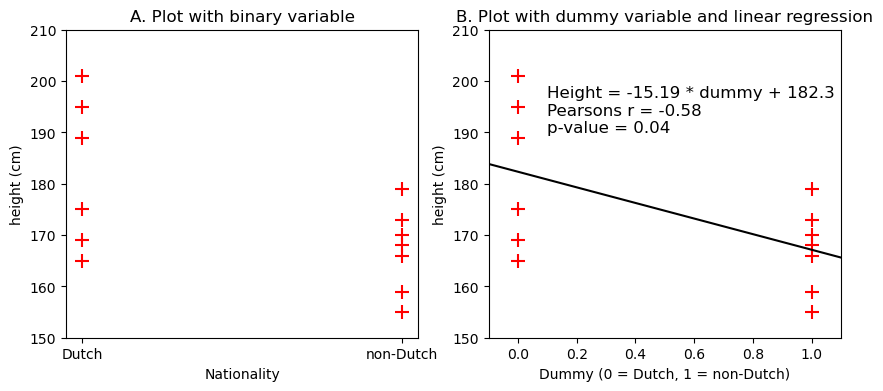

In [14]:
# Define variables
nationality = np.array(["Dutch", "Dutch", "Dutch", "Dutch", "Dutch", "Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch", "non-Dutch"])
height = np.array([175, 165, 169, 189, 201, 195, 159, 173, 179, 166, 155, 168, 170])

# Create dummy variable
dummy = np.where(nationality == "Dutch", 0, 1)

# Perform linear regression with dummy variable
slope, intercept = np.polyfit(dummy, height, 1)

# Check the correlation coefficient and significance of the regression
correlation_coefficient, p_value = pearsonr(dummy, height)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot A
axs[0].scatter(nationality, height, marker = '+', s = 100, color = "red") # Plot points
axs[0].set_title('A. Plot with binary variable')
axs[0].set_xlabel('Nationality')
axs[0].set_ylabel('height (cm)')
axs[0].set_ylim(150, 210)

# Plot B
axs[1].scatter(dummy, height, marker = '+', s = 100, color = "red") # Plot points
plt.plot(np.array([-0.1, 1.1]), slope * np.array([-0.1, 1.1]) + intercept, color='black') # Plot linear regression result
axs[1].set_title('B. Plot with dummy variable and linear regression')
axs[1].set_xlabel('Dummy (0 = Dutch, 1 = non-Dutch)')
axs[1].set_ylabel('height (cm)')
axs[1].set_ylim(150, 210)
axs[1].set_xlim(-0.1, 1.1)

# # Print the formula for the regression line
plt.text(0.1, 190, f'Height = {slope:.2f} * dummy + {intercept:.1f}\nPearsons r = {correlation_coefficient:.2f}\np-value = {p_value:.2f}', fontsize=12, color='black')

## Figure 22: Linear regression with a binary dependent variable (does not work)

Text(5, 0.7, 'Lung cancer? = 0.03 * dummy -0.31\nPearsons r = 0.84\np-value = 0.00')

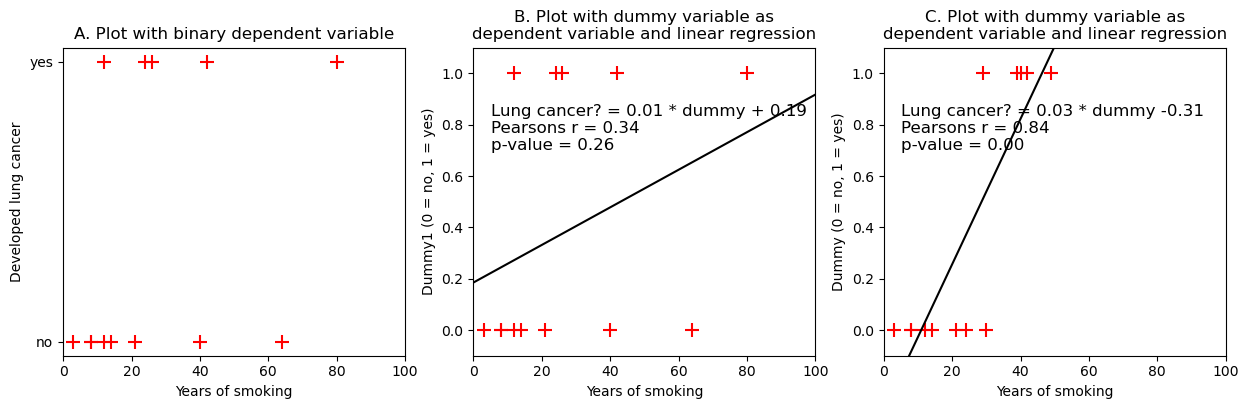

In [15]:
# Define variables
years_smoking1 = np.array([12, 26, 42, 24, 80, 3, 12, 64, 21, 14, 8, 40, 8])
developed_lung_cancer1 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])
years_smoking2 = np.array([29, 39, 42, 49, 40, 3, 12, 24, 21, 14, 8, 30, 8])
developed_lung_cancer2 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])

# Create dummy1 variable
dummy1 = np.where(developed_lung_cancer1 == "no", 0, 1)
dummy2 = np.where(developed_lung_cancer2 == "no", 0, 1)

# Perform linear regression with dummy1 variable
slope1, intercept1 = np.polyfit(years_smoking1, dummy1, 1)
slope2, intercept2 = np.polyfit(years_smoking2, dummy2, 1)

# Check the correlation coefficient and significance of the regression
correlation_coefficient1, p_value1 = pearsonr(years_smoking1, dummy1)
correlation_coefficient2, p_value2 = pearsonr(years_smoking2, dummy2)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plot A
axs[0].scatter(years_smoking1, developed_lung_cancer1, marker = '+', s = 100, color = "red") # Plot points
axs[0].set_title('A. Plot with binary dependent variable')
axs[0].set_xlabel('Years of smoking')
axs[0].set_ylabel('Developed lung cancer')
axs[0].invert_yaxis()
axs[0].set_xlim(0, 100)

# Plot B
axs[1].scatter(years_smoking1, dummy1, marker = '+', s = 100, color = "red") # Plot points
axs[1].plot(np.array([0, 100]), slope1 * np.array([0, 100]) + intercept1, color='black') # Plot linear regression result
axs[1].set_title('B. Plot with dummy variable as\ndependent variable and linear regression')
axs[1].set_xlabel('Years of smoking')
axs[1].set_ylabel('Dummy1 (0 = no, 1 = yes)')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(0, 100)
axs[1].text(5, 0.7, f'Lung cancer? = {slope1:.2f} * dummy + {intercept1:.2f}\nPearsons r = {correlation_coefficient1:.2f}\np-value = {p_value1:.2f}', fontsize=12, color='black')

# Plot C
axs[2].scatter(years_smoking2, dummy2, marker = '+', s = 100, color = "red") # Plot points
axs[2].plot(np.array([0, 100]), slope2 * np.array([0, 100]) + intercept2, color='black') # Plot linear regression result
axs[2].set_title('C. Plot with dummy variable as\ndependent variable and linear regression')
axs[2].set_xlabel('Years of smoking')
axs[2].set_ylabel('Dummy (0 = no, 1 = yes)')
axs[2].set_ylim(-0.1, 1.1)
axs[2].set_xlim(0, 100)
axs[2].text(5, 0.7, f'Lung cancer? = {slope2:.2f} * dummy {intercept2:.2f}\nPearsons r = {correlation_coefficient2:.2f}\np-value = {p_value2:.2f}', fontsize=12, color='black')


## Figure 23: The basic sigmoid function

Text(0, 0.5, 'Y')

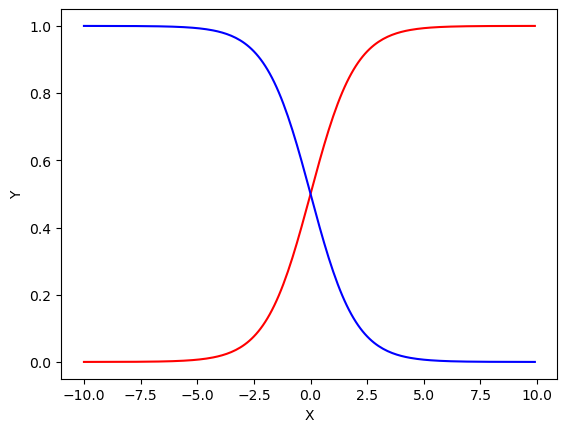

In [16]:
# Define variables
x = np.arange(-10, 10, 0.1)
y = 1 / (1 + np.exp(-1 * x))
y_neg = 1 - y

# Plot sigmoid curve
# plt.scatter(x, y, marker = '+', s = 100, color = "red") # Plot points
plt.plot(x, y, color = "red") # Plot line
plt.plot(x, y_neg, color = "blue") # Plot line
plt.xlabel('X')
plt.ylabel('Y')

## Figure 24: Logistic regression with a binary dependent variable

Optimization terminated successfully.
         Current function value: 0.609180
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   13
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            1
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                 0.08570
Time:                        08:20:30   Log-Likelihood:                -7.9193
converged:                       True   LL-Null:                       -8.6616
Covariance Type:            nonrobust   LLR p-value:                    0.2231
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3714      0.992     -1.382      0.167      -3.316       0.573
x1             0.0321      0.

Text(35, 0.7, '$p({{lung cancer}}) = \\frac{1}{1 + e^{-(-15.08 + 0.51 \\cdot {{years}})}}$')

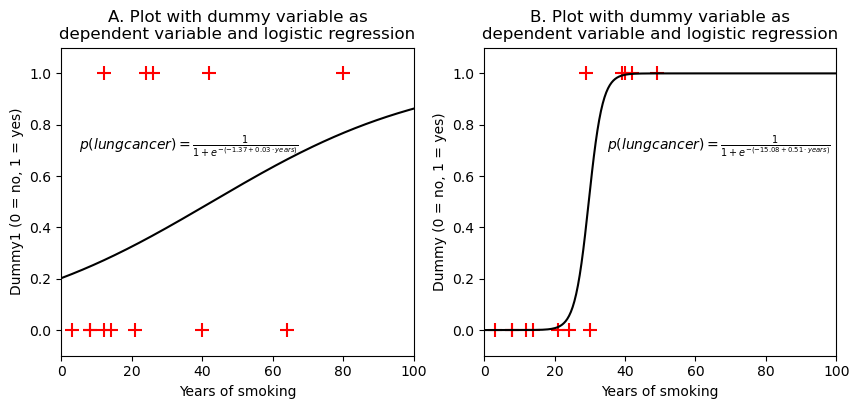

In [17]:
# Define variables
years_smoking1 = np.array([12, 26, 42, 24, 80, 3, 12, 64, 21, 14, 8, 40, 8])
developed_lung_cancer1 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])
years_smoking2 = np.array([29, 39, 42, 49, 40, 3, 12, 24, 21, 14, 8, 30, 8])
developed_lung_cancer2 = np.array(["yes", "yes", "yes", "yes", "yes", "no", "no", "no", "no", "no", "no", "no", "no"])

# Create dummy1 variable
dummy1 = np.where(developed_lung_cancer1 == "no", 0, 1)
dummy2 = np.where(developed_lung_cancer2 == "no", 0, 1)

# Perform logistic regression
# Example 1
years_smoking_with_constant1 = sm.add_constant(years_smoking1) # Add constant to the independent variable
logit_model1 = sm.Logit(dummy1, years_smoking_with_constant1) # Perform regression
logit_result1 = logit_model1.fit()
print(logit_result1.summary())

# Example 2
years_smoking_with_constant2 = sm.add_constant(years_smoking2) # Add constant to the independent variable
logit_model2 = sm.Logit(dummy2, years_smoking_with_constant2) # Perform regression
logit_result2 = logit_model2.fit()

# Generate x values for plotting model outcome
X_test = np.linspace(0, 100, 200)
X_test_with_constant = sm.add_constant(X_test)

# Predict the model outcomes for plotting
y1 = logit_result1.predict(X_test_with_constant)
y2 = logit_result2.predict(X_test_with_constant)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize = (10, 4))

# Plot A
axs[0].scatter(years_smoking1, dummy1, marker = '+', s = 100, color = "red") # Plot points
axs[0].plot(X_test, y1, color='black') # Plot linear regression result
axs[0].set_title('A. Plot with dummy variable as\ndependent variable and logistic regression')
axs[0].set_xlabel('Years of smoking')
axs[0].set_ylabel('Dummy1 (0 = no, 1 = yes)')
axs[0].set_ylim(-0.1, 1.1)
axs[0].set_xlim(0, 100)
axs[0].text(5, 0.7, r'$p({{lung cancer}}) = \frac{1}{1 + e^{-(%.2f + %.2f \cdot {{years}})}}$' % (logit_result1.params[0], logit_result1.params[1]))

# Plot B
axs[1].scatter(years_smoking2, dummy2, marker = '+', s = 100, color = "red") # Plot points
axs[1].plot(X_test, y2, color='black') # Plot linear regression result
axs[1].set_title('B. Plot with dummy variable as\ndependent variable and logistic regression')
axs[1].set_xlabel('Years of smoking')
axs[1].set_ylabel('Dummy (0 = no, 1 = yes)')
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(0, 100)
axs[1].text(35, 0.7, r'$p({{lung cancer}}) = \frac{1}{1 + e^{-(%.2f + %.2f \cdot {{years}})}}$' % (logit_result2.params[0], logit_result2.params[1]))


## Figure 25: Logistic distribution compared with normal distribution

Text(0, 0.5, 'Y')

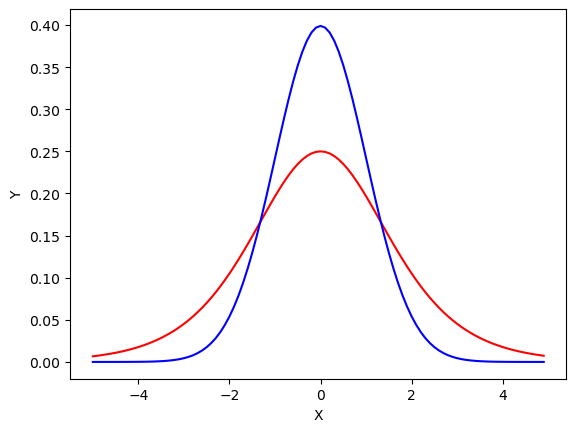

In [18]:
# Define variables
x = np.arange(-5, 5, 0.1)
y_log = np.exp(-1 * x) / ((1 + np.exp(-1 * x)) ** 2)
y_nor = 1 / (np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)

# Plot sigmoid curve
# plt.scatter(x, y, marker = '+', s = 100, color = "red") # Plot points
plt.plot(x, y_log, color = "red") # Plot line
plt.plot(x, y_nor, color = "blue") # Plot line
plt.xlabel('X')
plt.ylabel('Y')

## Table 10: Correlation matrics of a regular and closed random datasets

In [19]:
# Generate some random data: 4 variables with 100 observations
np.random.seed(0) # Set seed
df = pd.DataFrame({'A' : np.random.rand(100),
                  'B' : np.random.rand(100),
                  'C' : np.random.rand(100),
                  'D' : np.random.rand(100)}
)

# Calculate the closed-sum equivalent of the data 
dfclosed = df.div(df.sum(axis = 1), axis = 0)

# Calculate and plot correlation matrices
print(df.corr())
print(dfclosed.corr())

          A         B         C         D
A  1.000000 -0.066107 -0.036512  0.021895
B -0.066107  1.000000 -0.124047 -0.061987
C -0.036512 -0.124047  1.000000 -0.115117
D  0.021895 -0.061987 -0.115117  1.000000
          A         B         C         D
A  1.000000 -0.302010 -0.368956 -0.247604
B -0.302010  1.000000 -0.372964 -0.355542
C -0.368956 -0.372964  1.000000 -0.346469
D -0.247604 -0.355542 -0.346469  1.000000


## Figure 26: Example of a bivariate multi-normal distribution

(0.0, 30.0)

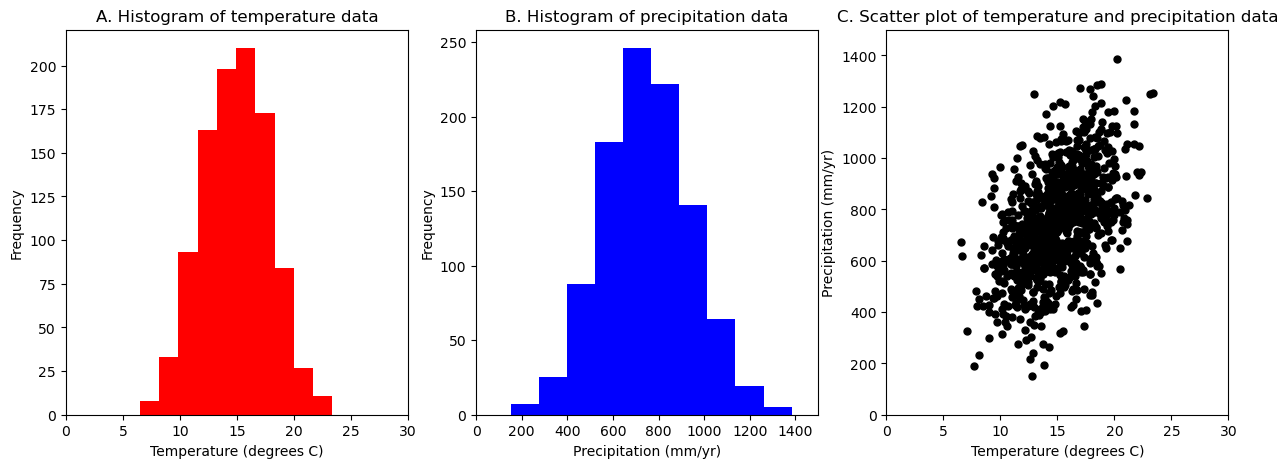

In [37]:
# Generate dataset
np.random.seed(0) # Set seed

# Parameters to set
mu_Temperature = 15
sd_Temperature = 3
variance_Temperature = sd_Temperature ** 2 # Variance is square of standard deviation

mu_Precipitation = 750
sd_Precipitation = 200
variance_Precipitation = sd_Precipitation ** 2 # Variance is square of standard deviation

multivar = np.random.multivariate_normal(
    [mu_Temperature, mu_Precipitation],
    [[variance_Temperature, sd_Temperature * sd_Precipitation * 0.5], [sd_Temperature * sd_Precipitation * 0.5, variance_Precipitation]], # Simulate correlation of 0.5
    1000
).T

# Plot histograms and scatterplot

# Create subplots
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs = axs.ravel()

# Plot A: histogram of temperature
axs[0].hist(multivar[0], color = "red") # Plot histogram
axs[0].set_title('A. Histogram of temperature data')
axs[0].set_xlabel('Temperature (degrees C)')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(0, 30)

# Plot B
axs[1].hist(multivar[1], color = "blue") # Plot histogram
axs[1].set_title('B. Histogram of precipitation data')
axs[1].set_xlabel('Precipitation (mm/yr)')
axs[1].set_ylabel('Frequency')
axs[1].set_xlim(0, 1500)

# Plot C
axs[2].scatter(multivar[0], multivar[1], marker = '.', s = 100, color = "black") # Plot histogram
axs[2].set_title('C. Scatter plot of temperature and precipitation data')
axs[2].set_ylabel('Precipitation (mm/yr)')
axs[2].set_xlabel('Temperature (degrees C)')
axs[2].set_ylim(0, 1500)
axs[2].set_xlim(0, 30)

## Figure 27: 3D plot of a bivariate multi-normal distribution with sampling

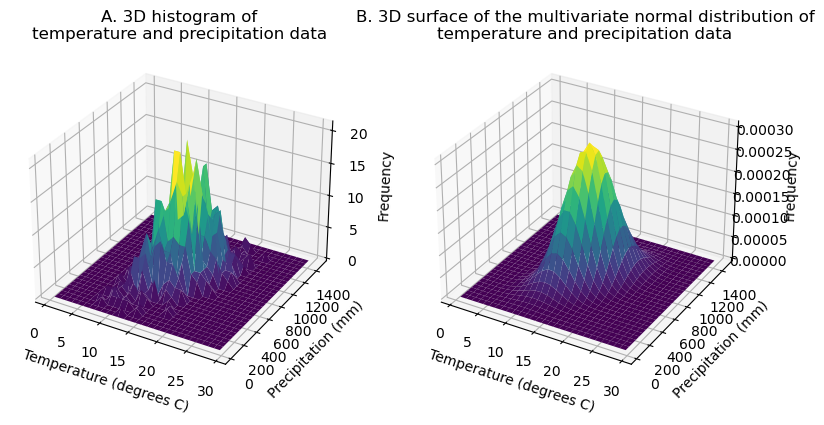

In [10]:
# Parameters to set
mu_Temperature = 15
sd_Temperature = 3
variance_Temperature = sd_Temperature ** 2 # Variance is square of standard deviation

mu_Precipitation = 750
sd_Precipitation = 200
variance_Precipitation = sd_Precipitation ** 2 # Variance is square of standard deviation

# Generate 1000 samples from multivariate normal
samples = np.random.multivariate_normal([mu_Temperature, mu_Precipitation],
    [[variance_Temperature, sd_Temperature * sd_Precipitation * 0.5], [sd_Temperature * sd_Precipitation * 0.5, variance_Precipitation]], # Simulate correlation of 0.5
    1000
)

# Create grid
x = np.linspace(0, 30, 30)
y = np.linspace(0, 1500, 30)
X, Y = np.meshgrid(x,y)

# Create a 2D histogram (binning the samples)
hist, x, y = np.histogram2d(samples[:, 0], samples[:, 1], bins = (x, y))

# Compute the bin centers
x_centers = (x[:-1] + x[1:]) / 2
y_centers = (y[:-1] + y[1:]) / 2
X, Y = np.meshgrid(x_centers, y_centers)

# Create multivariate normal surface
pos = np.empty(X.shape + (2, ))
pos[:, :, 0] = X; pos[:, :, 1] = Y
multivar = multivariate_normal(
    [mu_Temperature, mu_Precipitation],
    [[variance_Temperature, sd_Temperature * sd_Precipitation * 0.5], [sd_Temperature * sd_Precipitation * 0.5, variance_Precipitation]] # Simulate correlation of 0.5
)

# Create 3D figure with subplots
fig = plt.figure(figsize = plt.figaspect(0.5))

# A. 3D plot of multivariate histogram of samples
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, hist.T, cmap='viridis', edgecolor='none')
ax.set_title('A. 3D histogram of\ntemperature and precipitation data')
ax.set_xlabel('Temperature (degrees C)')
ax.set_ylabel('Precipitation (mm)')
ax.set_zlabel('Frequency')

# B. 3D plot of smooth multivariate normal
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, multivar.pdf(pos), cmap = 'viridis', linewidth = 0)
ax.set_title('B. 3D surface of the multivariate normal distribution of\ntemperature and precipitation data')
ax.set_xlabel('Temperature (degrees C)')
ax.set_ylabel('Precipitation (mm)')
ax.set_zlabel('Frequency')
plt.show()

## Figure 28: 3D plot of a bivariate multi-normal distribution with contour lines

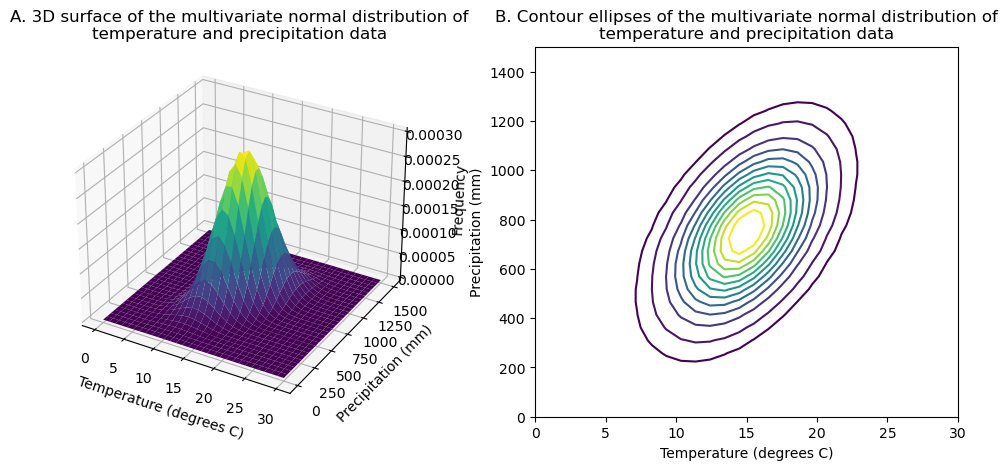

In [19]:
# Parameters to set
mu_Temperature = 15
sd_Temperature = 3
variance_Temperature = sd_Temperature ** 2 # Variance is square of standard deviation

mu_Precipitation = 750
sd_Precipitation = 200
variance_Precipitation = sd_Precipitation ** 2 # Variance is square of standard deviation

# Create grid
x = np.linspace(0, 30, 30)
y = np.linspace(0, 1500, 30)
X, Y = np.meshgrid(x,y)

# Create multivariate normal surface
pos = np.empty(X.shape + (2, ))
pos[:, :, 0] = X; pos[:, :, 1] = Y
multivar = multivariate_normal(
    [mu_Temperature, mu_Precipitation],
    [[variance_Temperature, sd_Temperature * sd_Precipitation * 0.5], [sd_Temperature * sd_Precipitation * 0.5, variance_Precipitation]] # Simulate correlation of 0.5
)

# Create 3D figure with subplots
fig = plt.figure(figsize = plt.figaspect(0.4))

# A. 3D plot of smooth multivariate normal
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X, Y, multivar.pdf(pos), cmap = 'viridis', linewidth = 0)
ax.set_title('A. 3D surface of the multivariate normal distribution of\ntemperature and precipitation data')
ax.set_xlabel('Temperature (degrees C)')
ax.set_ylabel('Precipitation (mm)')
ax.set_zlabel('Frequency')

# B. Contour plot of smooth multivariate normal
contour_levels = [0.00001, 0.000025, 0.00005, 0.000075, 0.0001, 0.000125, 0.00015, 0.000175, 0.0002, 0.000225, 0.00025, 0.000275]  # Set levels for ellipses
ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, multivar.pdf(pos), levels = contour_levels, cmap = 'viridis', linewidths = 1.5)
ax.set_title('B. Contour ellipses of the multivariate normal distribution of\ntemperature and precipitation data')
ax.set_xlabel('Temperature (degrees C)')
ax.set_ylabel('Precipitation (mm)')
plt.show()

## Figure 29: Plot of a dataset consisting of multiple groups of datapoints

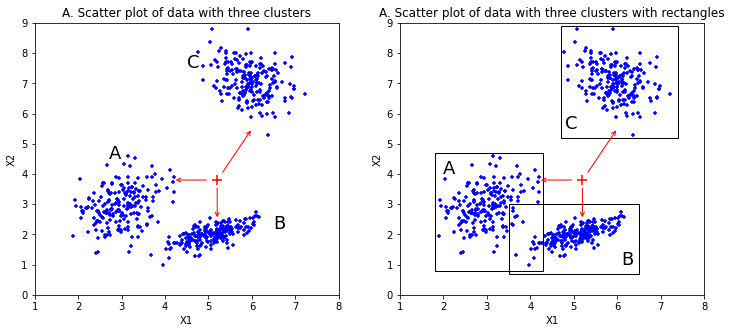

In [21]:
# Create dataset by sampling from three multivariate normal distributions
np.random.seed(0) # Set seed

samples1 = np.random.multivariate_normal([3, 3],
    [[0.25, 0.5 * 0.6 * 0.3], [0.5 * 0.6 * 0.3, 0.36]], # Simulate correlation of 0.5
    200
)
samples2 = np.random.multivariate_normal([5, 2],
    [[0.25, 0.5 * 0.3 * 0.7], [0.5 * 0.3 * 0.7, 0.09]], # Simulate correlation of 0.5
    200
)
samples3 = np.random.multivariate_normal([6, 7],
    [[0.25, 0.5 * 0.6 * -0.3], [0.5 * 0.6 * -0.3, 0.36]], # Simulate correlation of 0.5
    200
)

# Plot scatterplot panels

# Create subplots
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

# Plot A scatterplot
axs[0].scatter(samples1[:, 0], samples1[:, 1], marker = '+', s = 10, color = "blue") # Plot histogram
axs[0].scatter(samples2[:, 0], samples2[:, 1], marker = '+', s = 10, color = "blue") # Plot histogram
axs[0].scatter(samples3[:, 0], samples3[:, 1], marker = '+', s = 10, color = "blue") # Plot histogram
axs[0].scatter(5.2, 3.8, marker = '+', s = 100, color = "red") # Plot histogram
axs[0].set_title('A. Scatter plot of data with three clusters')
axs[0].set_ylabel('X2')
axs[0].set_xlabel('X1')
axs[0].set_ylim(0, 9)
axs[0].set_xlim(1, 8)
axs[0].text(2.7, 4.5, 'A', size = 18)
axs[0].text(6.5, 2.2, 'B', size = 18)
axs[0].text(4.5, 7.5, 'C', size = 18)

# Add annotation with arrows
axs[0].annotate('', xy = (5.2, 2.5), xytext = (5.2, 3.6), arrowprops = dict(arrowstyle = '->', color = 'red'))
axs[0].annotate('', xy = (4.2, 3.8), xytext = (5.0, 3.8), arrowprops = dict(arrowstyle = '->', color = 'red'))
axs[0].annotate('', xy = (6, 5.5), xytext = (5.3, 4), arrowprops = dict(arrowstyle = '->', color = 'red'))

# Plot B scatterplot with rectangles and arrows
axs[1].scatter(samples1[:, 0], samples1[:, 1], marker = '+', s = 10, color = "blue") # Plot histogram
axs[1].scatter(samples2[:, 0], samples2[:, 1], marker = '+', s = 10, color = "blue") # Plot histogram
axs[1].scatter(samples3[:, 0], samples3[:, 1], marker = '+', s = 10, color = "blue") # Plot histogram
axs[1].scatter(5.2, 3.8, marker = '+', s = 100, color = "red") # Plot histogram
axs[1].set_title('A. Scatter plot of data with three clusters with rectangles')
axs[1].set_ylabel('X2')
axs[1].set_xlabel('X1')
axs[1].set_ylim(0, 9)
axs[1].set_xlim(1, 8)
axs[1].text(2.0, 4.0, 'A', size = 18)
axs[1].text(6.1, 1.0, 'B', size = 18)
axs[1].text(4.8, 5.5, 'C', size = 18)

# Add annotation with arrows
axs[1].annotate('', xy = (5.2, 2.5), xytext = (5.2, 3.6), arrowprops = dict(arrowstyle = '->', color = 'red'))
axs[1].annotate('', xy = (4.2, 3.8), xytext = (5.0, 3.8), arrowprops = dict(arrowstyle = '->', color = 'red'))
axs[1].annotate('', xy = (6, 5.5), xytext = (5.3, 4), arrowprops = dict(arrowstyle = '->', color = 'red'))

# Add rectangles
rectA = patches.Rectangle(xy = (1.8, 0.8), width = 2.5, height = 3.9, edgecolor = 'black', facecolor = 'none')
rectB = patches.Rectangle(xy = (3.5, 0.7), width = 3.0, height = 2.3, edgecolor = 'black', facecolor = 'none')
rectC = patches.Rectangle(xy = (4.7, 5.2), width = 2.7, height = 3.7, edgecolor = 'black', facecolor = 'none')
axs[1].add_patch(rectA)
axs[1].add_patch(rectB)
axs[1].add_patch(rectC)

## Figure 30: 3D plot of a dataset consisting of three groups of datapoints plotted as multivariate normal distributions

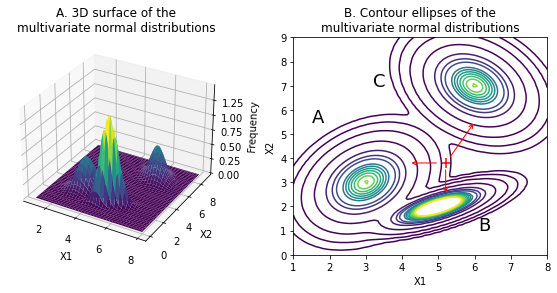

In [47]:
# Create dataset by sampling from three multivariate normal distributions
np.random.seed(0) # Set seed

samples1 = np.random.multivariate_normal([3, 3],
    [[0.25, 0.5 * 0.6 * 0.3], [0.5 * 0.6 * 0.3, 0.36]], # Simulate correlation of 0.5
    200
)
samples2 = np.random.multivariate_normal([5, 2],
    [[0.25, 0.5 * 0.3 * 0.7], [0.5 * 0.3 * 0.7, 0.09]], # Simulate correlation of 0.5
    200
)
samples3 = np.random.multivariate_normal([6, 7],
    [[0.25, 0.5 * 0.6 * -0.3], [0.5 * 0.6 * -0.3, 0.36]], # Simulate correlation of 0.5
    200
)

# Create grid
x = np.linspace(1, 8, 70)
y = np.linspace(0, 9, 90)
X, Y = np.meshgrid(x, y)

# Create multivariate normal surfaces
pos = np.empty(X.shape + (2, ))
pos[:, :, 0] = X; pos[:, :, 1] = Y
multivar1 = multivariate_normal(
    [3, 3],
    [[0.25, 0.5 * 0.6 * 0.3], [0.5 * 0.6 * 0.3, 0.36]]
)
multivar2 = multivariate_normal(
    [5, 2],
    [[0.25, 0.5 * 0.3 * 0.7], [0.5 * 0.3 * 0.7, 0.09]]
)
multivar3 = multivariate_normal(
    [6, 7],
    [[0.25, 0.5 * 0.6 * -0.3], [0.5 * 0.6 * -0.3, 0.36]]
)

# Create 3D figure with subplots
fig = plt.figure(figsize = plt.figaspect(0.4))

# A. 3D plot of smooth multivariate normal
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X, Y, multivar1.pdf(pos) + multivar2.pdf(pos) + multivar3.pdf(pos), cmap = 'viridis', linewidth = 0)
ax.set_title('A. 3D surface of the\nmultivariate normal distributions')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Frequency')

# B. Contour plot of smooth multivariate normal
contour_levels = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]  # Set levels for ellipses
ax = fig.add_subplot(1, 2, 2)
ax.contour(X, Y, multivar1.pdf(pos) + multivar2.pdf(pos) + multivar3.pdf(pos), levels = contour_levels, cmap = 'viridis', linewidths = 1.5)
ax.set_title('B. Contour ellipses of the\nmultivariate normal distributions')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Add group labels
ax.text(1.5, 5.5, 'A', size = 18)
ax.text(6.1, 1.0, 'B', size = 18)
ax.text(3.2, 7.0, 'C', size = 18)

# Add red sample and annotation with arrows
ax.scatter(5.2, 3.8, marker = '+', s = 100, color = "red") # Plot histogram
ax.annotate('', xy = (5.2, 2.5), xytext = (5.2, 3.6), arrowprops = dict(arrowstyle = '->', color = 'red'))
ax.annotate('', xy = (4.2, 3.8), xytext = (5.0, 3.8), arrowprops = dict(arrowstyle = '->', color = 'red'))
ax.annotate('', xy = (6, 5.5), xytext = (5.3, 4), arrowprops = dict(arrowstyle = '->', color = 'red'))
plt.show()

## Figure 31: Example of hierarchical clustering with 12 datapoints and two variables

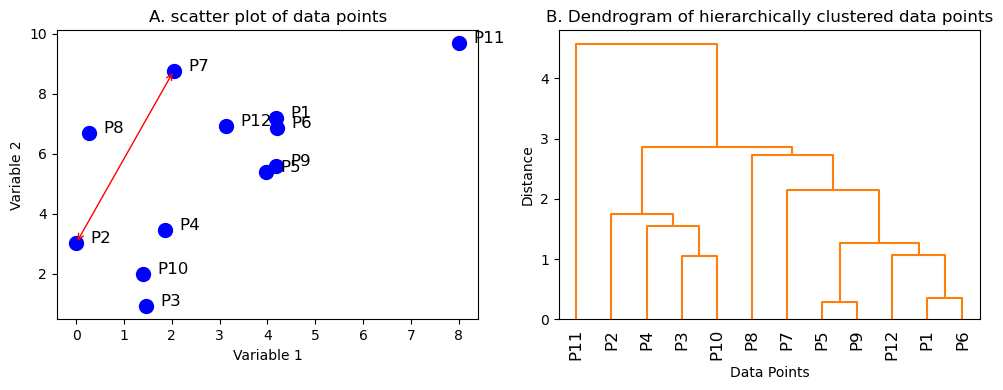

In [9]:
# Generate a small dataset with 12 data points and 2 variables
np.random.seed(1)  # For reproducibility
data = np.random.rand(12, 2) * 10  # 12 points in 2D space

# Perform hierarchical/agglomerative clustering
linked = linkage(data, method = 'single')

# Plot the scatter plot of the data points
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', s=100)
for i in range(data.shape[0]):
    plt.text(data[i, 0] + 0.3, data[i, 1], f'P{i+1}', fontsize=12) # Add point labels
plt.title('A. scatter plot of data points')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.annotate('', xy = (data[1, 0], data[1, 1]), xytext = (data[6, 0], data[6, 1]), arrowprops = dict(arrowstyle = '<->', color = 'red'))

# Plot the dendrogram
plt.subplot(1, 2, 2)
dendrogram(
    linked,
    labels=[f'P{i + 1}' for i in range(data.shape[0])],
    leaf_rotation = 90,
    color_threshold = 5
)
plt.title('B. Dendrogram of hierarchically clustered data points')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

## Figure 32: Example of dendrogram with cutoff line

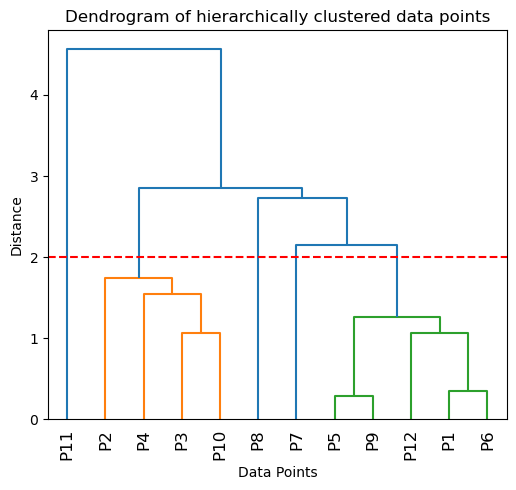

In [7]:
# Generate a small dataset with 12 data points and 2 variables
np.random.seed(1)  # For reproducibility
data = np.random.rand(12, 2) * 10  # 12 points in 2D space

# Perform hierarchical/agglomerative clustering
linked = linkage(data, method = 'single')

# Plot the scatter plot of the data points
plt.figure(figsize=(10, 5))

# Plot the dendrogram
plt.subplot(1, 2, 2)
dendrogram(
    linked,
    labels=[f'P{i + 1}' for i in range(data.shape[0])],
    leaf_rotation = 90,
    color_threshold = 2
)
plt.axhline(2, linestyle='--', color = 'red')
plt.title('Dendrogram of hierarchically clustered data points')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

## Figure 33: Hierarchical clustering with different similarity metrics

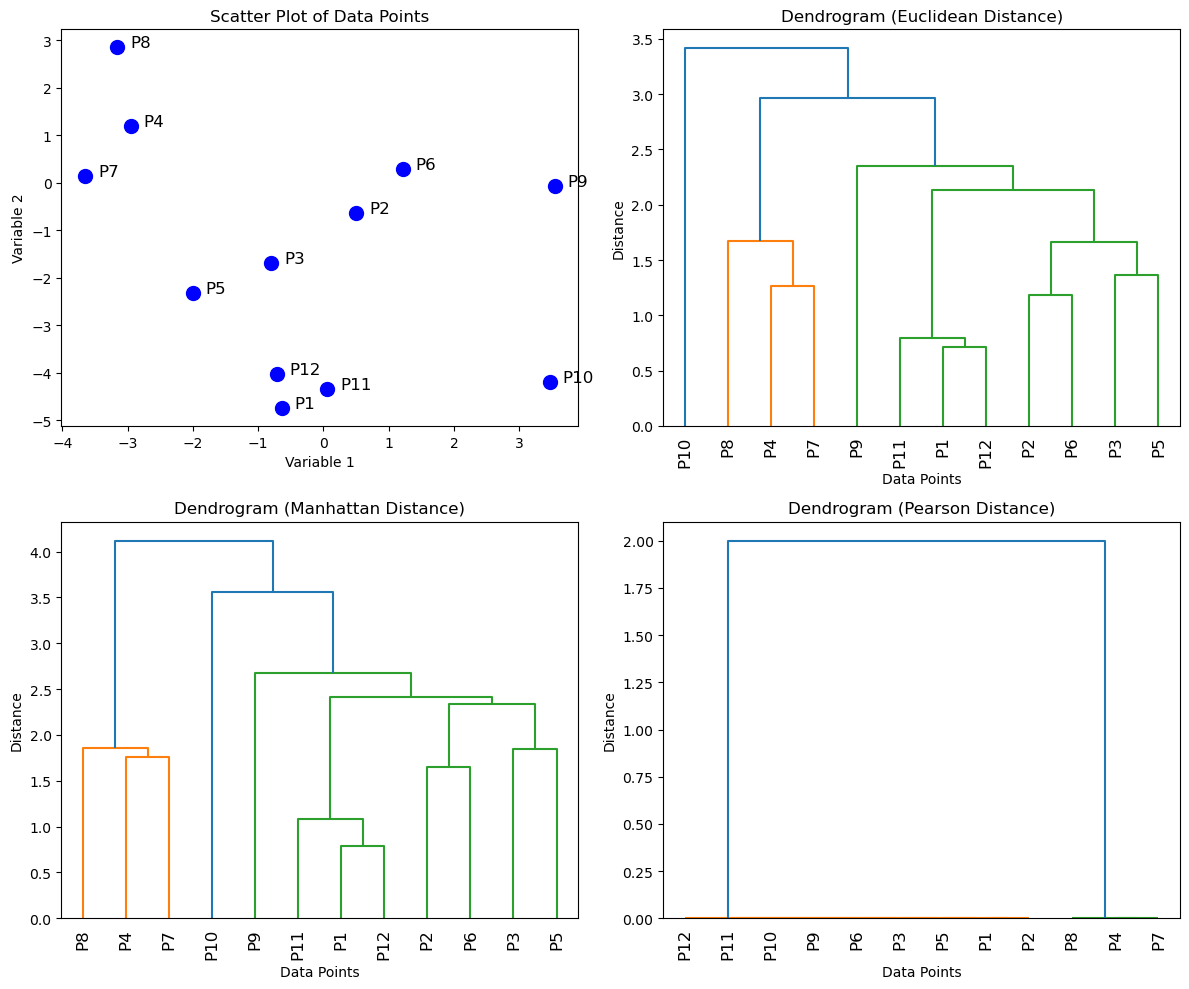

In [8]:
# Generate a small dataset with 12 data points and 2 variables
np.random.seed(2)  # For reproducibility
data = np.random.rand(12, 2) * 10 - 5  # 12 points in 2D space

# Define different distance metrics
distance_metrics = {
    'Euclidean': 'euclidean',
    'Manhattan': 'cityblock',
    'Pearson': 'correlation'
}

# Create a figure with 1 row and 4 columns for the scatter plot + 3 dendrograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot of the data points (Top-left corner)
axes[0, 0].scatter(data[:, 0], data[:, 1], c='blue', s=100)
for i in range(data.shape[0]):
    axes[0, 0].text(data[i, 0] + 0.2, data[i, 1], f'P{i+1}', fontsize=12)
axes[0, 0].set_title('Scatter Plot of Data Points')
axes[0, 0].set_xlabel('Variable 1')
axes[0, 0].set_ylabel('Variable 2')

# Perform hierarchical clustering and plot dendrograms for each distance metric
for i, (metric_name, metric) in enumerate(distance_metrics.items()):
    
    # Perform hierarchical clustering
    linked = linkage(data, method = 'single', metric = metric)
    
    # Determine the subplot location
    ax_row = (i + 1) // 2
    ax_col = (i + 1) % 2
    
    # Plot the dendrogram
    dendrogram(linked, labels=[f'P{i+1}' for i in range(data.shape[0])], leaf_rotation=90, ax=axes[ax_row, ax_col])
    axes[ax_row, ax_col].set_title(f'Dendrogram ({metric_name} Distance)')
    axes[ax_row, ax_col].set_xlabel('Data Points')
    axes[ax_row, ax_col].set_ylabel('Distance')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Figure 44: Example of a time series with time at regular intervals on the horizontal axis

Text(0.5, 1.0, 'Daily drainage of the Dinkel river')

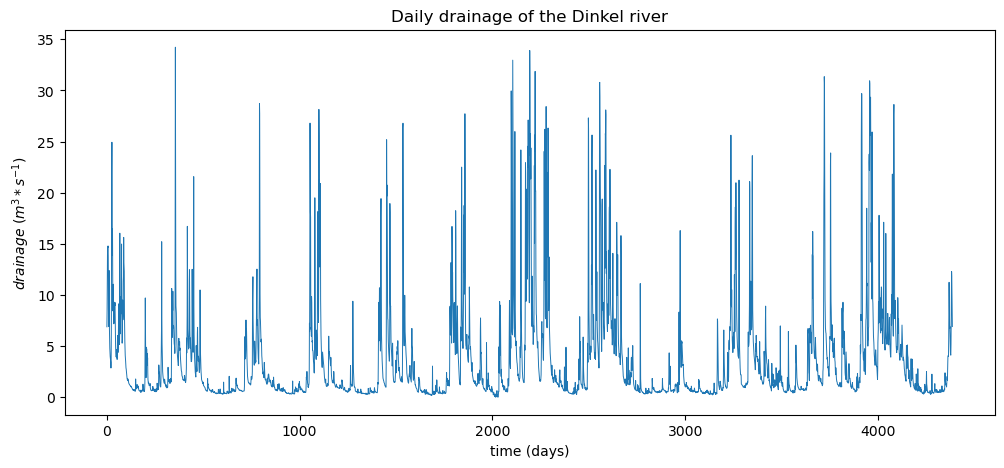

In [24]:
# Load data
data = loadmat('TSA_example_Dinkel.mat')

# Extract time series
df = pd.DataFrame(np.concatenate((data['t'], data['data']), axis=1), columns=['t', 'data'])

# Plot time series
plt.figure(1, figsize = (12, 5)) # Create plot
plt.plot(df['t'], df['data'], linewidth = 0.7) # Plot the drainage data variable against variable t
plt.xlabel('time (days)') # Label x axis
plt.ylabel(r'$drainage~(m^3*s^{-1})$') # Label y axis
plt.title('Daily drainage of the Dinkel river')


## Figure 45: